# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 15 баллов






-----

In [62]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set3')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

### <b><font color="blue">Легкая часть</font></b> 


## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [63]:
airData =  pd.read_csv("airquality.csv")
airData.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [64]:
airData.describe().apply(lambda x: round(x, 2))

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.00,146.00,153.00,153.00,153.00,153.00
mean,42.13,185.93,9.96,77.88,6.99,15.80
std,32.99,90.06,3.52,9.47,1.42,8.86
min,1.00,7.00,1.70,56.00,5.00,1.00
25%,18.00,115.75,7.40,72.00,6.00,8.00
50%,31.50,205.00,9.70,79.00,7.00,16.00
75%,63.25,258.75,11.50,85.00,8.00,23.00
max,168.00,334.00,20.70,97.00,9.00,31.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:**

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

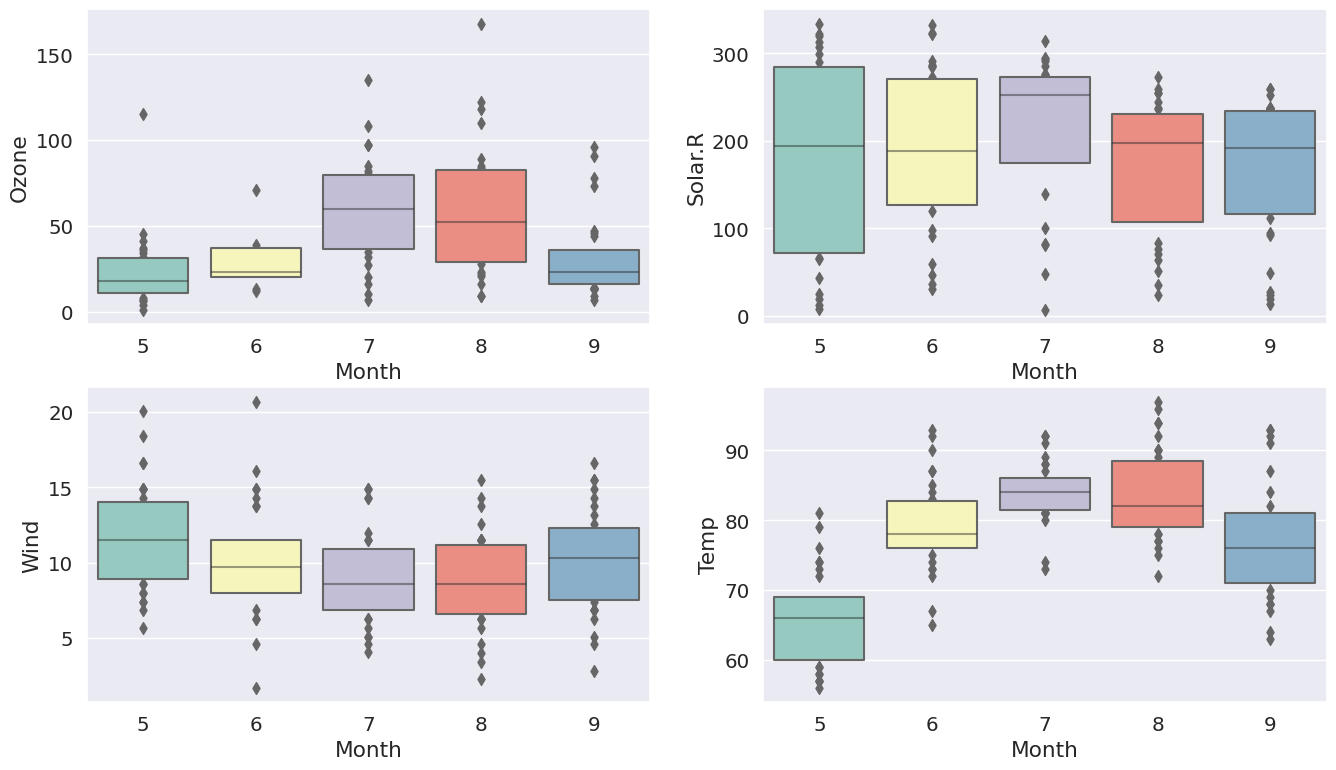

In [65]:
plotableColumns = ["Ozone", "Solar.R", "Wind", "Temp"]
fig, ax = plt.subplots(2, 2, figsize = (16,9), dpi = 100)

for ind, column in enumerate(plotableColumns):
    indX, indY = ind // 2, ind % 2
    sns.boxenplot(x = airData.Month, 
                  y = airData[column], 
                  ax = ax[indX, indY])
    # ax[indX, indY].axhline(np.mean(airData[column]),
    #                        alpha = 0.7,
    #                        color = 'pink',
    #                        label = 'Среднее')
    # ax[indX, indY].legend()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

In [66]:
print("Колонка Ozone - медиана = {:.2f}, среднее = {:.2f}".format(np.nanmedian(airData.Ozone),
                                                                  np.nanmean(airData.Ozone)))

Колонка Ozone - медиана = 31.50, среднее = 42.13


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:**

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:**

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:**

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:**

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

In [2]:
# ваш код

Сделайте выводы по полученной таблице.

**Вывод:**

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

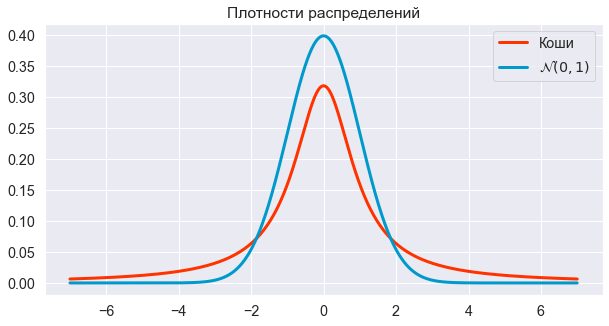

In [4]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [ ]:
# ваш код

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

In [ ]:
# ваш код

**Вывод:**

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [ ]:
# ваш код

Построим аналогичный график. 

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**